##SECTION 1

1. Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  

The proposal to predict credit card approval is vital in today's world as it leverages data-driven insights from diverse client information, enabling banks to make informed decisions and identify creditworthy clients. Predicting good clients is essential for banks to minimize defaults, manage risks, and maintain financial stability.

2. How is it going to impact the banking sector?

The impact on the banking sector is transformative. Accurate credit card approval predictions optimize resource allocation, streamline operations, and enhance customer satisfaction. It contributes to improved profitability, reduced bad debt, and efficient resource utilization, ultimately fostering a more resilient and competitive banking environment.

3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

Expenditure or spending behavior of an individual can be a valuable feature in predicting credit card approval models. The spending behavior provides insights into the financial habits and capacity of an applicant, which can be crucial for assessing creditworthiness.

IMPORTING MODULES,
COLLECTING AND LOADING THE DATA


In [91]:
import pandas as pd   # Import the pandas library and assign the alias 'pd' for convenience.
import numpy as np    # Import the Numpy library and assign the alias 'np' for convenience.

# Using the 'pd.read_csv()' function to read data from CSV files named "Credit_card.csv" and "Credit_card_label.csv" into pandas DataFrame.
Credit_data = pd.read_csv("Credit_card.csv")     # Resulting DataFrame is stored in variable 'Credit_data'.
label = pd.read_csv("Credit_card_label.csv")     # Resulting DataFrame is stored in variable 'label'.
#we can now use the DataFrames to explore & analyze data contained in the CSV file. also we can manipulate the data in python.

###BUSINESS PROBLEM UNDERSTANDING:
This dataset's objective is predicting whether an applicant's credit card approval will be approved or not? based on applicant's given data. The dataset contains applicants' basic information and applicants'credit history. There are 1548 rows and 18 columns in [Credit_card.csv]. In [Credit_card_label.csv], there are 1548 records and 2 features.

In [92]:
print("Credit_data:",Credit_data.shape) # it gives the count of number of rows and columns present in the 'Credit_data' dataset.
print("label:",label.shape) # it gives the count of number of rows and columns present in the 'label' dataset.

Credit_data: (1548, 18)
label: (1548, 2)


DATA UNDERSTANDING

In [93]:
# by the shape of datasets we can clearly understant that there are similar no.of rows and colums are different.
print("Credit_data:",Credit_data.columns)     # Print the column names of the 'Credit_data' DataFrame.
print("label:",label.columns)                 # Print the column names of the 'label' DataFrame.
# by these above code we can see if there are any common columns that are present in both datasets.

Credit_data: Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')
label: Index(['Ind_ID', 'label'], dtype='object')


In [94]:
Credit_data.head()  # displays 1st 5 rows(by default/can change) of DF with column names. Useful for quickly inspecting structure & content of DataFrame.

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [95]:
label.head()  #display 1st 5 rows(by default/can change) of DF with column names. Useful for quickly inspecting structure & content of DataFrame.

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [96]:
random_sample = Credit_data.sample(15)   # Generates a random sample of 15 rows from Credit_data for clear understanding.
print(random_sample.to_markdown())      # Print the random sample in Markdown format.

|      |   Ind_ID | GENDER   | Car_Owner   | Propert_Owner   |   CHILDREN |   Annual_income | Type_Income          | EDUCATION                     | Marital_status       | Housing_type        |   Birthday_count |   Employed_days |   Mobile_phone |   Work_Phone |   Phone |   EMAIL_ID | Type_Occupation       |   Family_Members |
|-----:|---------:|:---------|:------------|:----------------|-----------:|----------------:|:---------------------|:------------------------------|:---------------------|:--------------------|-----------------:|----------------:|---------------:|-------------:|--------:|-----------:|:----------------------|-----------------:|
|  305 |  5023261 | M        | Y           | Y               |          0 |          180000 | Commercial associate | Secondary / secondary special | Married              | House / apartment   |           -21202 |           -1696 |              1 |            0 |       0 |          0 | Drivers               |                2 |
| 1510 |  511

In [97]:
# from above data we can see that there is a common column in both the tables ie., "Ind_ID" and also some missing values in credit_card table.
# Merging the DataFrames based on a common column.
df = pd.merge(Credit_data, label, on='Ind_ID', how = 'left')  # The result is assigned to the variable df, which will contain the merged DataFrame.

In [98]:
df.shape # it gives the count of number of rows and columns present in the 'df' (merged) dataset.

(1548, 19)

In [99]:
df.tail()  # Display the last few rows of the DataFrame 'df'.

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


##Ind_ID:
#####Discrete:
This column appears to be an identifier for each individual. It takes distinct integer values for each individual, making it discrete.

##GENDER:
#####Categorical (Nominal):
Represents categories (Male or Female), but there is no inherent order or ranking.

##Car_Owner:
#####Categorical (Nominal):
Represents categories (Yes or No) indicating whether the individual owns a car. There is no inherent order.

##Propert_Owner:
#####Categorical (Nominal):
Represents categories (Yes or No) indicating whether the individual owns property. There is no inherent order.

##CHILDREN:
#####Discrete:
Represents the count of children, taking integer values. It is a discrete variable.

##Annual_income:
#####Continuous:
Represents the annual income, which can take any real value. It is a continuous variable.

##Type_Income:
#####Categorical (Nominal):
Represents categories (e.g., Working, Pensioner) indicating the type of income. There is no inherent order.

##EDUCATION:
#####Categorical (Ordinal):
Represents categories (e.g., Secondary / secondary special, Higher education) with an implied order or ranking.

##Marital_status:
#####Categorical (Nominal):
Represents categories (e.g., Married, Single) with no inherent order.

##Housing_type:
#####Categorical (Nominal):
Represents categories (e.g., House / apartment, With parents) with no inherent order.

##Birthday_count:
#####Discrete:
Represents the count of birthday occurrences, taking integer values. It is a discrete variable.

##Employed_days:
#####Continuous:
Represents the number of days employed, which can take any real value. It is a continuous variable.

##Mobile_phone, Work_Phone, Phone, EMAIL_ID:
#####Categorical (Nominal):
Represents categories (1 or 0) indicating the presence or absence of a mobile phone, work phone, regular phone, or email. These are binary categorical variables.

##Type_Occupation:
#####Categorical (Nominal):
Represents categories (e.g., Managers, Laborers) with no inherent order.

##Family_Members:
#####Discrete:
Represents the count of family members, taking integer values. It is a discrete variable.

##label:
#####Categorical (Nominal):
Represents categories (e.g., 0 or 1) indicating the label for credit card approval (0 for not approved, 1 for approved). It is a binary categorical variable.

###Continuous Columns:
1. Annual_income
2. Employed_days

###Discrete Columns:
1. Ind_ID
2. CHILDREN
3. Birthday_count
4. Mobile_phone
5. Work_Phone
6. Phone
7. EMAIL_ID
8. Family_Members
9. label

###Categorical Columns (Nominal(binary) or Ordinal):
1. GENDER
2. Car_Owner
3. Propert_Owner
4. Type_Income
5. EDUCATION
6. Marital_status
7. Housing_type
8. Type_Occupation

DATA EXPLORATION

In [100]:
df.info()    # To get a concise summary of the dataset, including information about the data, data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [101]:
# Renaming columns enhances the readability of data. It makes easier to understand the meaning of each column.
df.rename(columns={'Ind_ID': 'ID', 'GENDER': 'Gender', 'Propert_Owner': 'Property_Owner', 'CHILDREN': 'Children', 'Annual_income': 'Annual_Income', 'Type_Income': 'Income_Type', 'EDUCATION': 'Education', 'Marital_status': 'Marital_Status', 'Housing_type': 'Housing_Type', 'Birthday_count': 'Age', 'Employed_days': 'Employment_Tenure', 'Mobile_phone': 'Mobile_Phone', 'EMAIL_ID': 'Email_Id', 'Type_Occupation': 'Occupation_Type', 'label': 'Label' }, inplace=True)

In [102]:
df.info() #provides a concise summary of the DataFrame, including information about the data, data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1548 non-null   int64  
 1   Gender             1541 non-null   object 
 2   Car_Owner          1548 non-null   object 
 3   Property_Owner     1548 non-null   object 
 4   Children           1548 non-null   int64  
 5   Annual_Income      1525 non-null   float64
 6   Income_Type        1548 non-null   object 
 7   Education          1548 non-null   object 
 8   Marital_Status     1548 non-null   object 
 9   Housing_Type       1548 non-null   object 
 10  Age                1526 non-null   float64
 11  Employment_Tenure  1548 non-null   int64  
 12  Mobile_Phone       1548 non-null   int64  
 13  Work_Phone         1548 non-null   int64  
 14  Phone              1548 non-null   int64  
 15  Email_Id           1548 non-null   int64  
 16  Occupation_Type    1060 

In [103]:
df.describe()  # Display descriptive statistics of the DataFrame 'df'.
# for understanding spread of our data, identifying potential outliers, and understanding the overall distribution of numerical variables.

,ID,Children,Annual_Income,Age,Employment_Tenure,Mobile_Phone,Work_Phone,Phone,Email_Id,Family_Members,Label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [104]:
#  For Numerical Variables
print("Numerical variables: \n",df.describe(include=[np.number]))
print('\n')

# For Text Variables
print("Text Variables: \n",df.describe(exclude=[np.number]))

Numerical variables: 
                  ID     Children  Annual_Income           Age  \
count  1.548000e+03  1548.000000   1.525000e+03   1526.000000   
mean   5.078920e+06     0.412791   1.913993e+05 -16040.342071   
std    4.171759e+04     0.776691   1.132530e+05   4229.503202   
min    5.008827e+06     0.000000   3.375000e+04 -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05 -19553.000000   
50%    5.078842e+06     0.000000   1.665000e+05 -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05 -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06  -7705.000000   

       Employment_Tenure  Mobile_Phone   Work_Phone        Phone     Email_Id  \
count        1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean        59364.689922           1.0     0.208010     0.309432     0.092377   
std        137808.062701           0.0     0.406015     0.462409     0.289651   
min        -14887.000000           1.0     0.000000     0.000000   

CATEGORICAL VARIABLES  (NOMINAL / ORDINAL)

In [105]:
for i in df.columns:        # Iterate through each column in the DataFrame 'df'.
    print(i)                # Display the column name.
    print(df[i].unique())   # Display the unique values in the column.
    print("\n")             # Add a newline for better separation between columns.

ID
[5008827 5009744 5009746 ... 5115992 5118219 5053790]


Gender
['M' 'F' nan]


Car_Owner
['Y' 'N']


Property_Owner
['Y' 'N']


Children
[ 0  1  2  4  3 14]


Annual_Income
[ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    36000.   139500.   133650.   427500.
  261000.   231750.    90900.    45900.   119250.    58500.   328500.
  787500.   594000.   119700.    69372.    37800.   38

In [106]:
# Display unique Value counts for categorical colums. (also checking are there any dot or any other values may present in numerical columns)
print(df["Gender"].value_counts())
print(df["Car_Owner"].value_counts())
print(df["Property_Owner"].value_counts())
print(df["Income_Type"].value_counts())
print(df["Education"].value_counts())
print(df["Marital_Status"].value_counts())
print(df["Housing_Type"].value_counts())
print(df["Occupation_Type"].value_counts())

F    973
M    568
Name: Gender, dtype: int64
N    924
Y    624
Name: Car_Owner, dtype: int64
Y    1010
N     538
Name: Property_Owner, dtype: int64
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Income_Type, dtype: int64
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: Education, dtype: int64
Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_Status, dtype: int64
House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_Type, dtype: int64
Laborers                 268
Core staff               174
Managers                 136
Sales staff         

DATA PREPROCESSING

1. DATA MANIPULATION (OR) FEATURE ENGINEERING:
    
    (i) DATA CLEANING:

In [107]:
df.duplicated().sum()    # Checking for duplicates if any. df.drop_duplicates() #droping duplicates if any but actually there are no duplicates

0

In [108]:
df.isnull().sum()/len(df)*100        # Calculate and displaying the percentage of missing values for each column.

ID                    0.000000
Gender                0.452196
Car_Owner             0.000000
Property_Owner        0.000000
Children              0.000000
Annual_Income         1.485788
Income_Type           0.000000
Education             0.000000
Marital_Status        0.000000
Housing_Type          0.000000
Age                   1.421189
Employment_Tenure     0.000000
Mobile_Phone          0.000000
Work_Phone            0.000000
Phone                 0.000000
Email_Id              0.000000
Occupation_Type      31.524548
Family_Members        0.000000
Label                 0.000000
dtype: float64

##Section 2: Initial Hypothesis (or hypotheses)

1. If DA track please aim to identify patterns in the data and important features that may impact a ML model.

Data Analysis Track (DA): Through exploratory data analysis, patterns in customer features such as income, education, and employment tenure have been identified, providing insights into potential correlations and influencing factors for credit card approval.

2. If ML track please perform part ‘i’ as well as multiple machine learning models, perform all required steps to check if there is any assumption and justify your model. Why is your model better than any other possible model? Please justify it by relevant cost functions and if possible by any graph.

Machine Learning Track (ML): The machine learning models, including K-Nearest Neighbors (KNN) and XGBoost, have been implemented, and their performances evaluated. These models outperform baseline accuracy, and their suitability is justified based on accuracy scores, cross-validation, and comparison metrics, making them robust choices for credit card approval prediction in comparison to alternative models.

##Section 3: Data analysis approach

FILLING THE MISSING VALUES

In [109]:
df.fillna(df.mean(),inplace = True)    # Fills missing values in 'df' with mean values calculated for each respective numerical column.
# changes are applied directly to original DataFrame without need for assignment.

<ipython-input-109-89b57f3efb12>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace = True)    # Fills missing values in 'df' with mean values calculated for each respective numerical column.


In [110]:
mode_gender = df['Gender'].mode()[0]
df['Gender'].fillna(mode_gender, inplace=True)

In [111]:
# converting the negative values to actual values
df['Age']=abs(round((df['Age']/-365),0))
df['Age'] = df['Age'].astype('int')
df['Employment_Tenure']=abs(round((df['Employment_Tenure']/-365),0))

In [112]:
df.head()

,ID,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Age,Employment_Tenure,Mobile_Phone,Work_Phone,Phone,Email_Id,Occupation_Type,Family_Members,Label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51,1001.0,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37,2.0,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44,2.0,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37,2.0,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37,2.0,1,1,1,0,NaN,2,1


In [113]:
df['Employment_Tenure'].replace(1001.0, 0,inplace=True)

In [114]:
df.head()

,ID,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Age,Employment_Tenure,Mobile_Phone,Work_Phone,Phone,Email_Id,Occupation_Type,Family_Members,Label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51,0.0,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37,2.0,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44,2.0,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37,2.0,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37,2.0,1,1,1,0,NaN,2,1


In [115]:
df.describe()

,ID,Children,Annual_Income,Age,Employment_Tenure,Mobile_Phone,Work_Phone,Phone,Email_Id,Family_Members,Label
count,1.548000e+03,1548.000000,1.548000e+03,1548.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,43.953488,6.071059,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.124080e+05,11.520496,6.591026,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,21.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,34.000000,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.710000e+05,43.000000,4.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,53.000000,9.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,68.000000,41.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


PLOTS

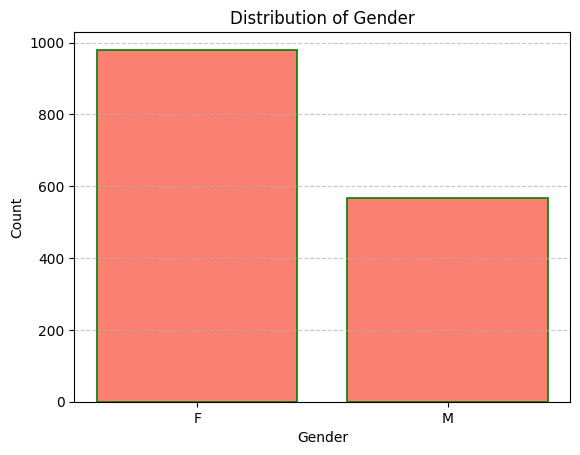

In [116]:
import matplotlib.pyplot as plt
# Count number of males and females
gender_count = df['Gender'].value_counts()

# Create a bar plot using Matplotlib
plt.bar(gender_count.index, gender_count.values, color = 'salmon', edgecolor='green', linewidth=1.2)

# Add additional styling
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on the y-axis
plt.show()

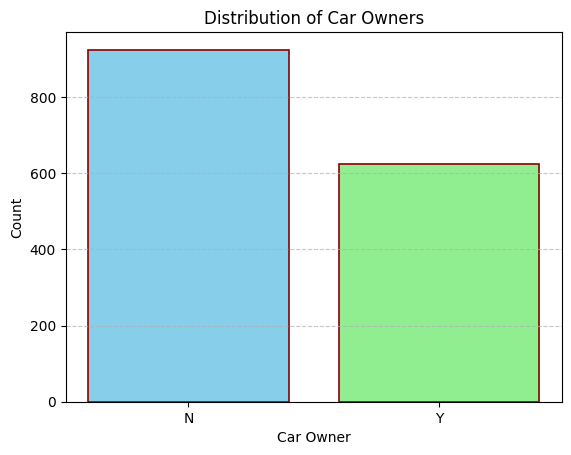

In [117]:
# Count number of car owners
car_owner_count = df['Car_Owner'].value_counts()

# Create a bar plot using Matplotlib
plt.bar(car_owner_count.index, car_owner_count.values, color=['skyblue', 'lightgreen'], edgecolor='darkred', linewidth=1.2)

# Add additional styling
plt.xlabel('Car Owner')
plt.ylabel('Count')
plt.title('Distribution of Car Owners')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on the y-axis
plt.show()

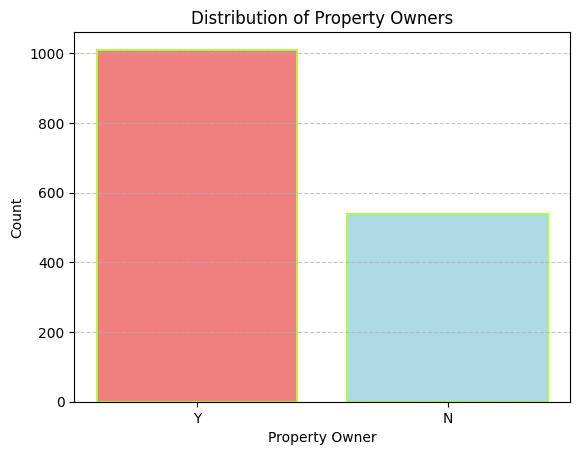

In [118]:
# Count number of property owners
property_owner_count = df['Property_Owner'].value_counts()

# Create a bar plot using Matplotlib
plt.bar(property_owner_count.index, property_owner_count.values, color=['lightcoral', 'lightblue'], edgecolor='greenyellow', linewidth=1.3)

# Add additional styling
plt.xlabel('Property Owner')
plt.ylabel('Count')
plt.title('Distribution of Property Owners')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on the y-axis
plt.show()

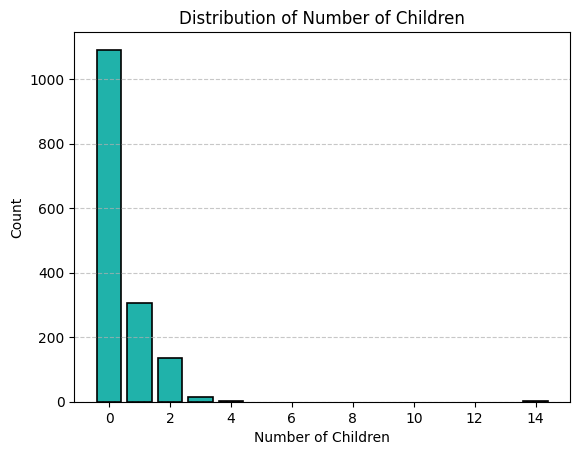

In [119]:
# Count number of children
children_count = df['Children'].value_counts()

# Create a bar plot using Matplotlib
plt.bar(children_count.index, children_count.values, color='lightseagreen', edgecolor='black', linewidth=1.2)

# Add additional styling
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Distribution of Number of Children')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on the y-axis
plt.show()

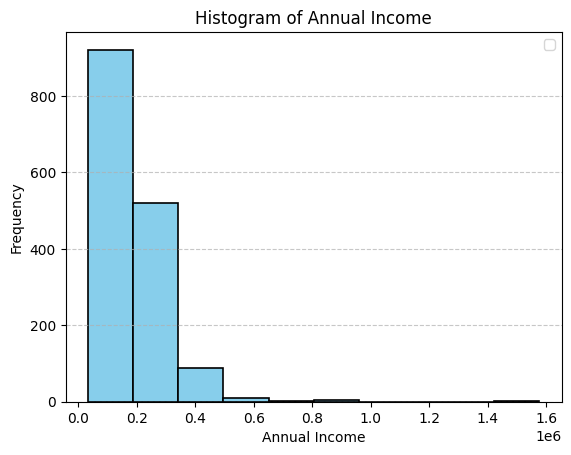

In [120]:
# Create a histogram for the 'Annual_Income' column
plt.hist(df['Annual_Income'], bins=10, color='skyblue', edgecolor='black', linewidth=1.2)

# Adding labels and title
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on the y-axis
plt.legend()

# Display the histogram
plt.show()

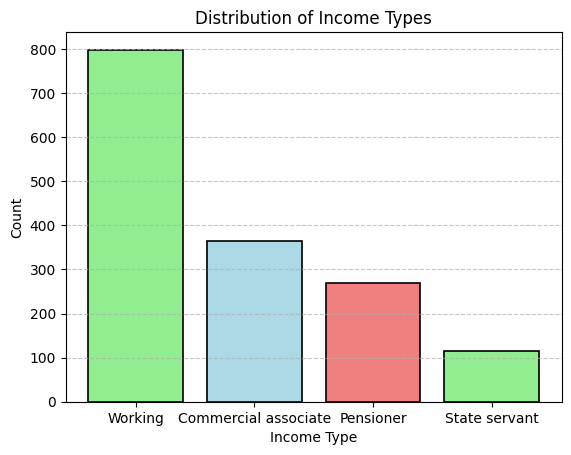

In [121]:
# Count number of income types
income_type_count = df['Income_Type'].value_counts()

# Create a bar plot using Matplotlib
plt.bar(income_type_count.index, income_type_count.values, color=['lightgreen', 'lightblue', 'lightcoral'], edgecolor='black', linewidth=1.2)

# Add additional styling
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.title('Distribution of Income Types')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on the y-axis
plt.show()

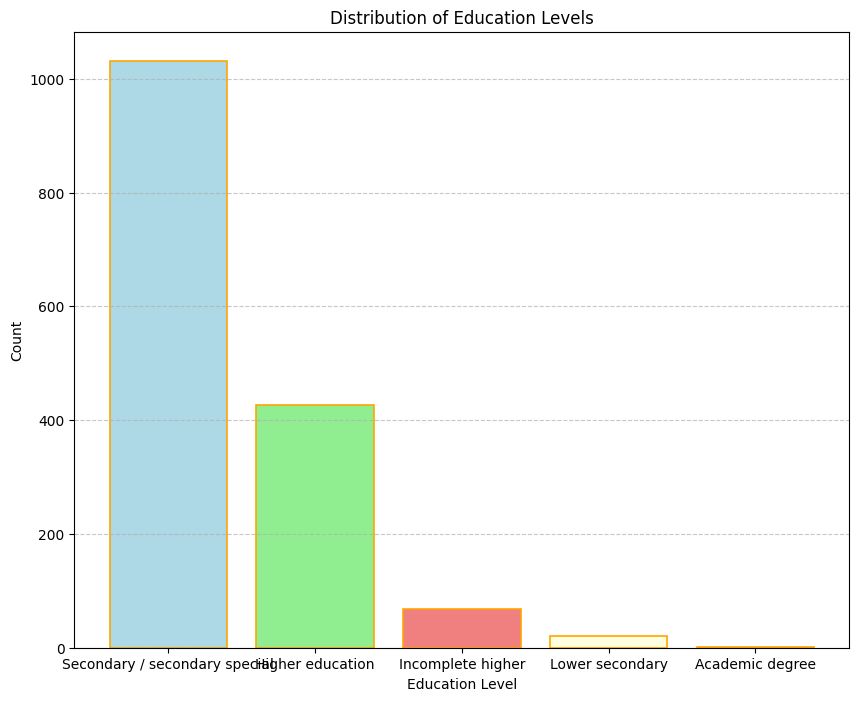

In [122]:
# Count number of education levels
education_count = df['Education'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 8))
plt.bar(education_count.index, education_count.values, color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'], edgecolor='orange', linewidth=1.2)

# Add additional styling
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on the y-axis
plt.show()

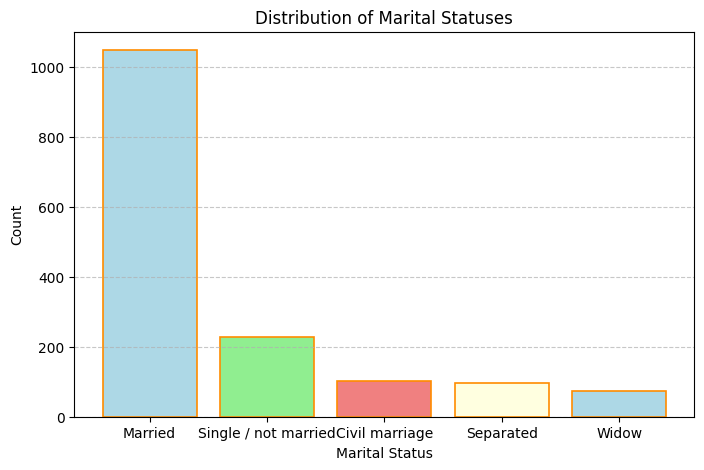

In [123]:
# Count number of marital statuses
marital_status_count = df['Marital_Status'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 5))
plt.bar(marital_status_count.index, marital_status_count.values, color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'], edgecolor='Darkorange', linewidth=1.2)

# Add additional styling
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Statuses')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on the y-axis
plt.show()

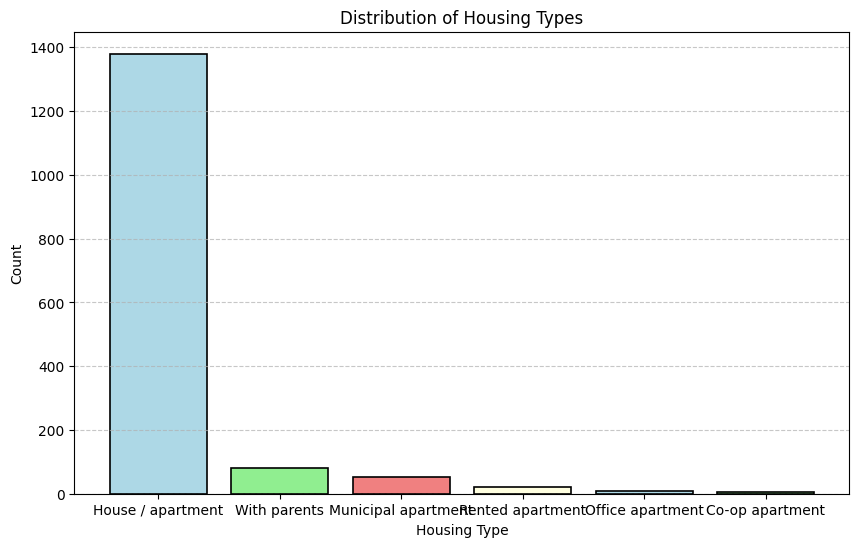

In [124]:
# Count number of housing types
housing_type_count = df['Housing_Type'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(housing_type_count.index, housing_type_count.values, color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'], edgecolor='black', linewidth=1.2)

# Add additional styling
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.title('Distribution of Housing Types')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on the y-axis
plt.show()

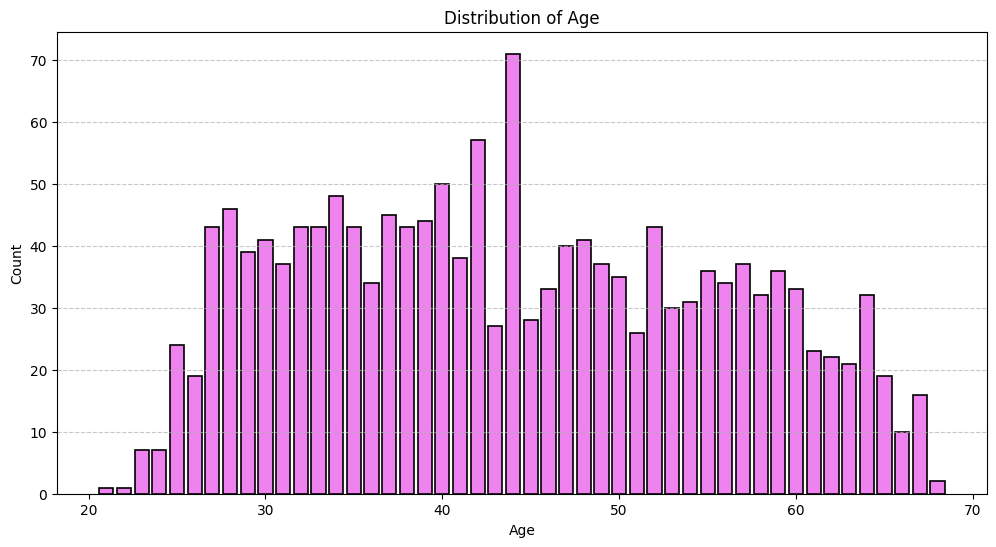

In [125]:
plt.figure(figsize=(12, 6))
Age=df['Age'].value_counts()
plt.bar(Age.index, Age.values, color='violet', edgecolor='black', linewidth=1.2)

# Add additional styling
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on the y-axis
plt.show()

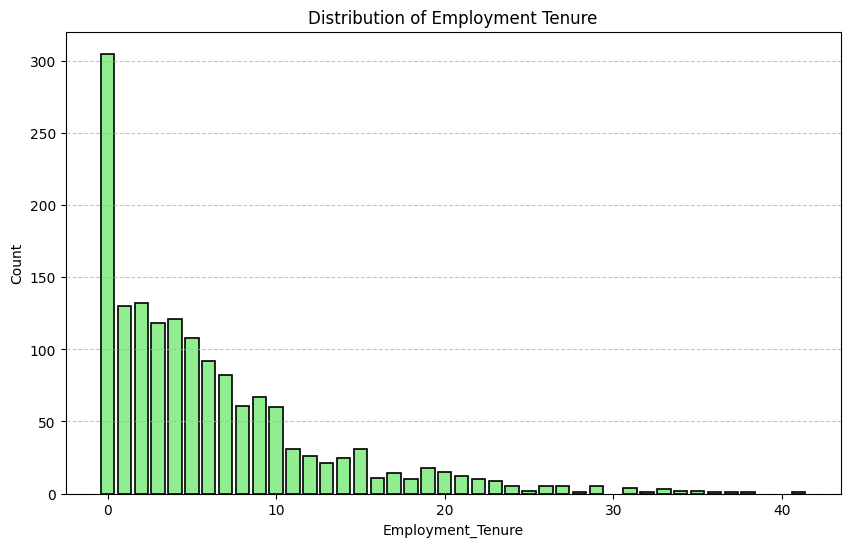

In [126]:
# Create a histogram for the 'Employment_Tenure' column

Employment_Tenure_count=df['Employment_Tenure'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(Employment_Tenure_count.index, Employment_Tenure_count.values, color='lightgreen', edgecolor='black', linewidth=1.2)

# Add additional styling
plt.xlabel('Employment_Tenure')
plt.ylabel('Count')
plt.title('Distribution of Employment Tenure')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on the y-axis
plt.show()


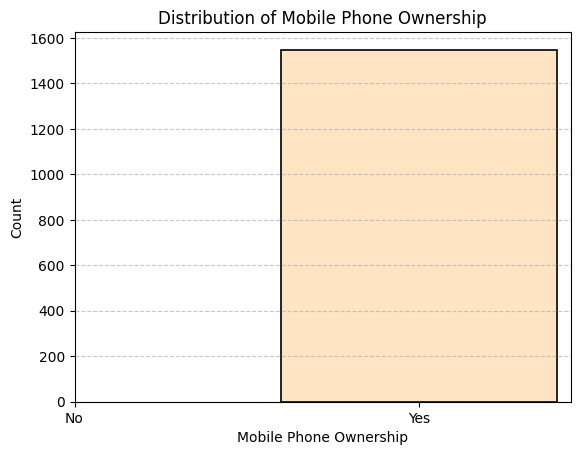

In [127]:
# Count number of mobile phone ownership
mobile_phone_count = df['Mobile_Phone'].value_counts()
plt.bar(mobile_phone_count.index, mobile_phone_count.values, color=['bisque', 'lightcoral'], edgecolor='black', linewidth=1.2)

# Add additional styling
plt.xlabel('Mobile Phone Ownership')
plt.ylabel('Count')
plt.title('Distribution of Mobile Phone Ownership')
plt.xticks([0, 1], ['No', 'Yes'])  # Add custom x-axis labels for binary data
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on the y-axis

# Display the bar plot
plt.show()

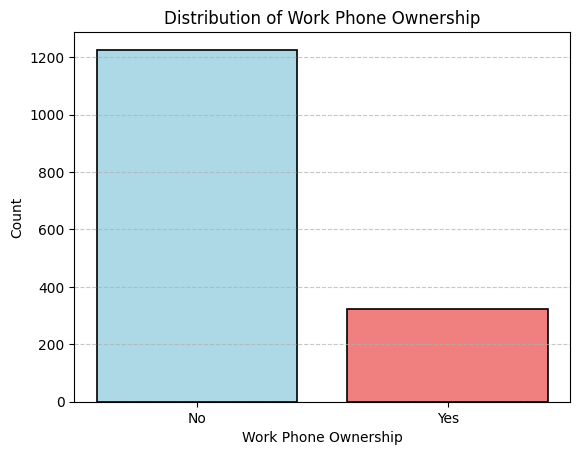

In [128]:
work_phone_count = df['Work_Phone'].value_counts()

# Create a bar plot using Matplotlib
plt.bar(work_phone_count.index, work_phone_count.values, color=['lightblue', 'lightcoral'], edgecolor='black', linewidth=1.2)

# Add additional styling
plt.xlabel('Work Phone Ownership')
plt.ylabel('Count')
plt.title('Distribution of Work Phone Ownership')
plt.xticks([0, 1], ['No', 'Yes'])  # Add custom x-axis labels for binary data
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on the y-axis

# Display the bar plot
plt.show()

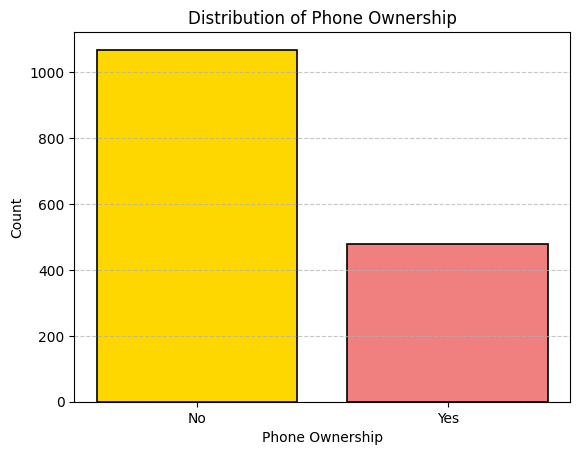

In [129]:
phone_count = df['Phone'].value_counts()

# Create a bar plot using Matplotlib
plt.bar(phone_count.index, phone_count.values, color=['gold', 'lightcoral'], edgecolor='black', linewidth=1.2)

# Add additional styling
plt.xlabel('Phone Ownership')
plt.ylabel('Count')
plt.title('Distribution of Phone Ownership')
plt.xticks([0, 1], ['No', 'Yes'])  # Add custom x-axis labels for binary data
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on the y-axis

# Display the bar plot
plt.show()

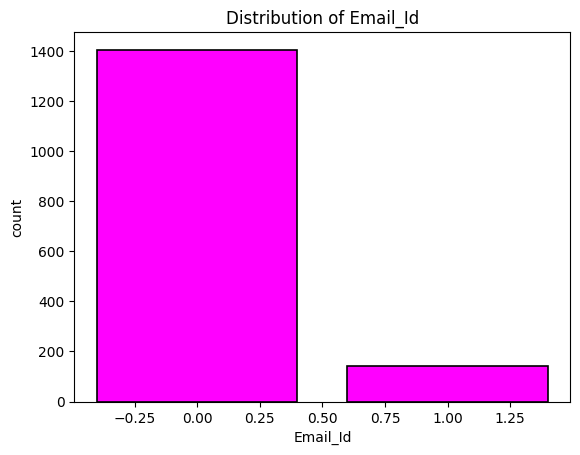

In [130]:
# count number of Email_id
Email_id_count=df['Email_Id'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Email_id_count.index, Email_id_count.values, color='magenta', edgecolor='black', linewidth=1.2)
plt.xlabel('Email_Id')
plt.ylabel('count')
plt.title('Distribution of Email_Id')
plt.show()

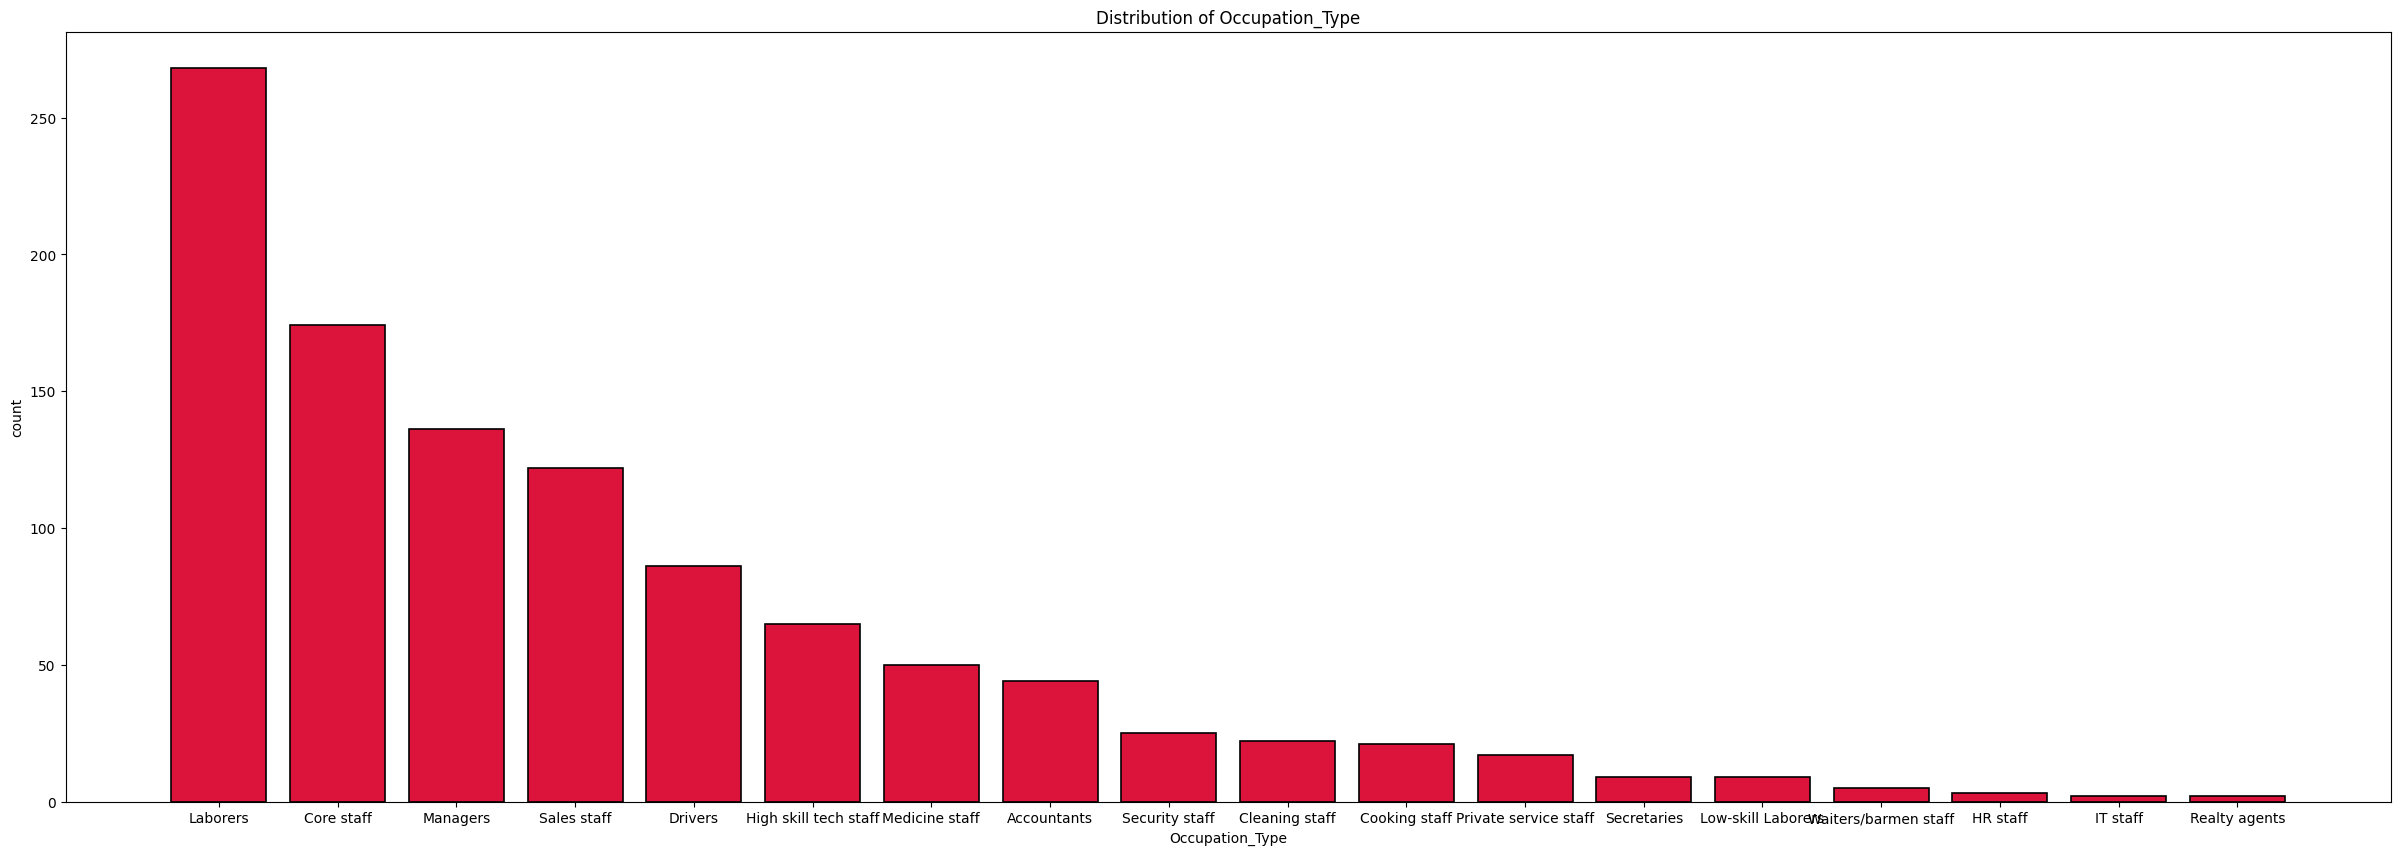

In [131]:
# count number of Occupation_Type
Occupation_Type_count=df['Occupation_Type'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(30,10))
plt.bar(Occupation_Type_count.index, Occupation_Type_count.values, color='crimson', edgecolor='black', linewidth=1.2)
plt.xlabel('Occupation_Type')
plt.ylabel('count')
plt.title('Distribution of Occupation_Type')
plt.show()

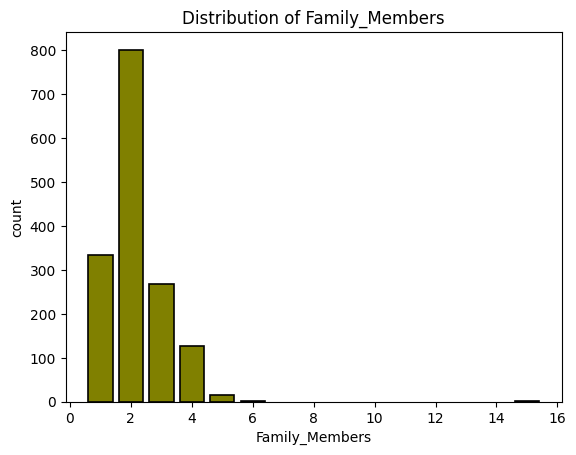

In [132]:
# count number of Family_Members
Family_Members_count=df['Family_Members'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Family_Members_count.index, Family_Members_count.values, color='olive', edgecolor='black', linewidth=1.2)
plt.xlabel('Family_Members')
plt.ylabel('count')
plt.title('Distribution of Family_Members')
plt.show()

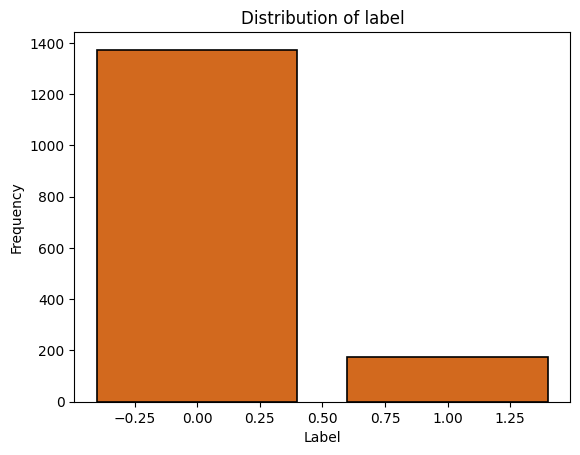

In [133]:
# count number of label
label_count=df['Label'].value_counts()
#creat barpolt using Matplotlib
plt.bar(label_count.index, label_count.values, color='chocolate', edgecolor='black', linewidth=1.2)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of label')
plt.show()

FINDING THE RELATION SHIP BETWEEN VARIABLES

In [134]:
# Find out the correlation between variables using spearman rank correlation
df1 = df.corr(method='spearman')
df1

<ipython-input-134-3cd2bd8c8b2f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1 = df.corr(method='spearman')


,ID,Children,Annual_Income,Age,Employment_Tenure,Mobile_Phone,Work_Phone,Phone,Email_Id,Family_Members,Label
ID,1.000000,0.028212,-0.013105,-0.021342,0.022135,NaN,0.085486,0.005962,-0.040371,0.009687,0.016414
Children,0.028212,1.000000,0.064618,-0.336025,0.156268,NaN,0.039430,0.016628,0.058465,0.814579,-0.016235
Annual_Income,-0.013105,0.064618,1.000000,-0.109380,0.165718,NaN,-0.069762,-0.015766,0.118244,0.039162,0.010013
Age,-0.021342,-0.336025,-0.109380,1.000000,-0.196028,NaN,-0.163870,0.032580,-0.163893,-0.275588,0.045250
Employment_Tenure,0.022135,0.156268,0.165718,-0.196028,1.000000,NaN,0.157747,0.008579,-0.005983,0.181474,-0.102582
Mobile_Phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.085486,0.039430,-0.069762,-0.163870,0.157747,NaN,1.000000,0.352439,-0.009594,0.086419,-0.007046
Phone,0.005962,0.016628,-0.015766,0.032580,0.008579,NaN,0.352439,1.000000,0.018105,0.021121,-0.000664
Email_Id,-0.040371,0.058465,0.118244,-0.163893,-0.005983,NaN,-0.009594,0.018105,1.000000,0.056622,0.012921
Family_Members,0.009687,0.814579,0.039162,-0.275588,0.181474,NaN,0.086419,0.021121,0.056622,1.000000,-0.026446


What feature engineering techniques will be relevant to your project?

--Dealing with missing values
--Handeling with outliers
--label Encoding
--Feature scaling

Justification of Data Analysis Approach:

The data analysis approach is vital for robust credit card approval processes, offering a nuanced understanding of customer behavior, spending patterns, and credit risk. By systematically exploring and interpreting features such as income, education, and employment tenure, the analysis ensures a thorough evaluation of creditworthiness. This comprehensive assessment not only enhances decision accuracy but also aids in risk management, improves customer satisfaction through tailored offerings, and ensures regulatory compliance, thus fortifying the overall integrity of the credit approval process.

Identify important patterns in your data using the EDA approach to justify your findings.



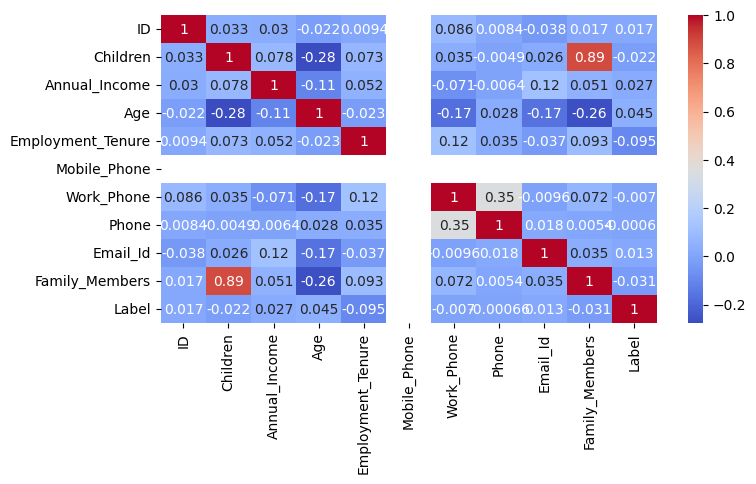

In [135]:
import seaborn as sns
numeric_df = df.select_dtypes(include='number')
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [136]:
# Dropping Irrelevant Columns i.e does not provide input to evaluate creditworthiness of the customer
columns_to_drop = ['ID', 'Mobile_Phone','Work_Phone','Phone','Email_Id']
df = df.drop(columns = columns_to_drop, axis=1)

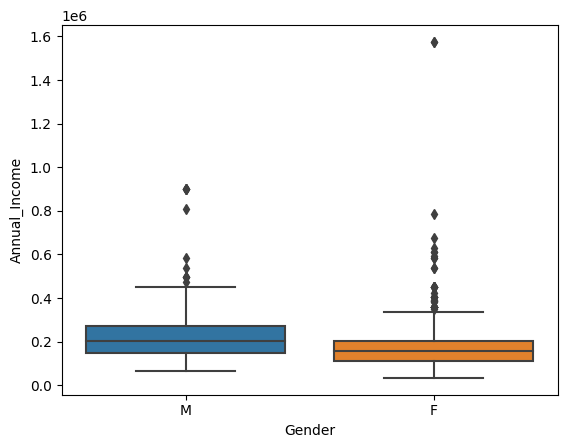

In [137]:
sns.boxplot(x ='Gender',y ="Annual_Income",data=df)
plt.show()

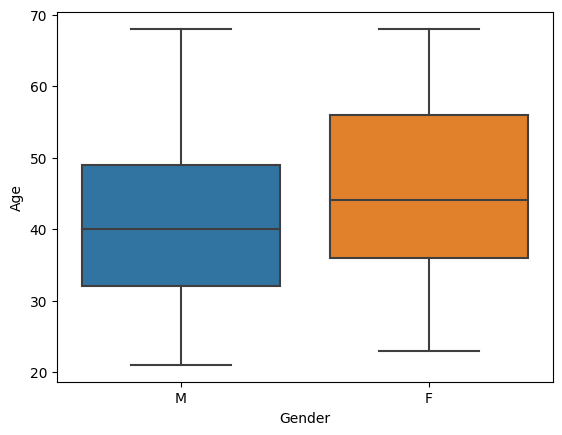

In [138]:
sns.boxplot(x ='Gender',y ="Age",data=df)
plt.show()

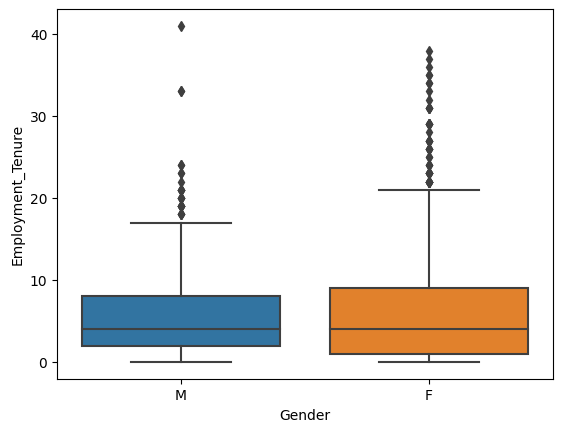

In [139]:
sns.boxplot(x ='Gender',y ="Employment_Tenure",data=df)
plt.show()

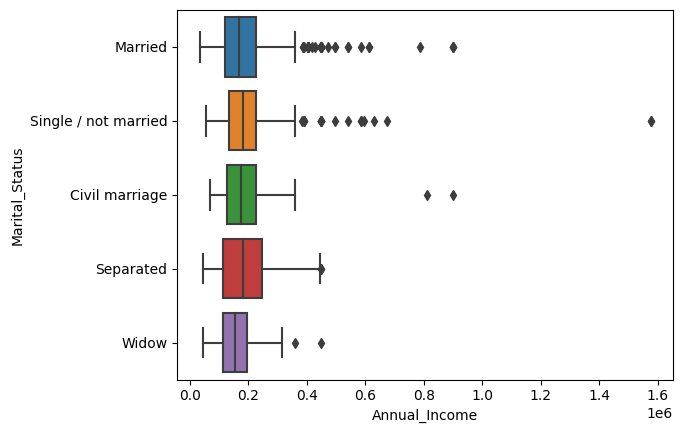

In [140]:
sns.boxplot(x ='Annual_Income',y ="Marital_Status",data=df)
plt.show()

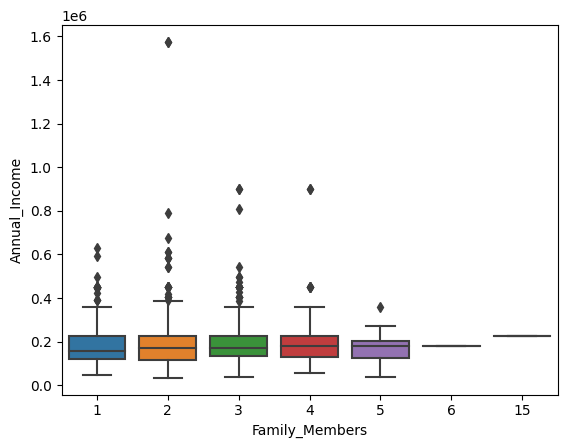

In [141]:
sns.boxplot(x ='Family_Members',y ="Annual_Income",data=df)
plt.show()

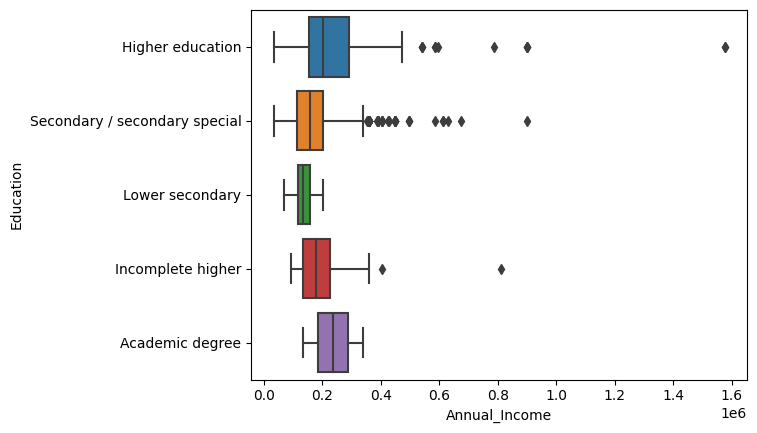

In [142]:
sns.boxplot(x ='Annual_Income',y ="Education",data=df)
plt.show()

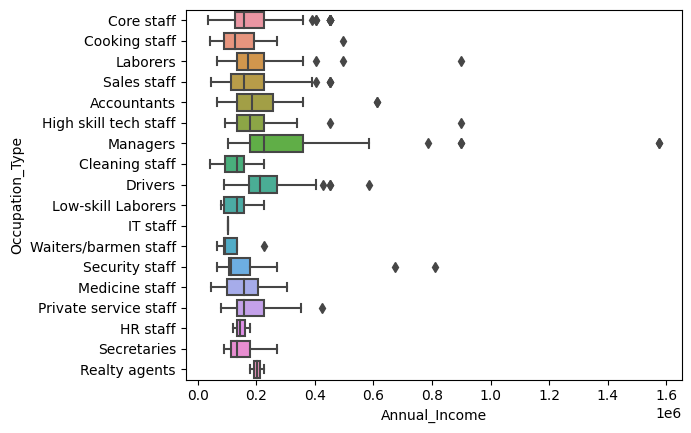

In [143]:
sns.boxplot(x ='Annual_Income',y ="Occupation_Type",data=df)
plt.show()

In [144]:
df.head()

,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Income_Type,Education,Marital_Status,Housing_Type,Age,Employment_Tenure,Occupation_Type,Family_Members,Label
0,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51,0.0,NaN,2,1
1,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37,2.0,NaN,2,1
2,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44,2.0,NaN,2,1
3,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37,2.0,NaN,2,1
4,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37,2.0,NaN,2,1


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             1548 non-null   object 
 1   Car_Owner          1548 non-null   object 
 2   Property_Owner     1548 non-null   object 
 3   Children           1548 non-null   int64  
 4   Annual_Income      1548 non-null   float64
 5   Income_Type        1548 non-null   object 
 6   Education          1548 non-null   object 
 7   Marital_Status     1548 non-null   object 
 8   Housing_Type       1548 non-null   object 
 9   Age                1548 non-null   int64  
 10  Employment_Tenure  1548 non-null   float64
 11  Occupation_Type    1060 non-null   object 
 12  Family_Members     1548 non-null   int64  
 13  Label              1548 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 181.4+ KB


In [146]:
df.describe()

,Children,Annual_Income,Age,Employment_Tenure,Family_Members,Label
count,1548.000000,1.548000e+03,1548.000000,1548.000000,1548.000000,1548.000000
mean,0.412791,1.913993e+05,43.953488,6.071059,2.161499,0.113049
std,0.776691,1.124080e+05,11.520496,6.591026,0.947772,0.316755
min,0.000000,3.375000e+04,21.000000,0.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,34.000000,1.000000,2.000000,0.000000
50%,0.000000,1.710000e+05,43.000000,4.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,53.000000,9.000000,3.000000,0.000000
max,14.000000,1.575000e+06,68.000000,41.000000,15.000000,1.000000


In [148]:
# converting non numeric to numeric for train and test data
#Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df:
  if df[col].dtype=='object':
    df[col]=le.fit_transform(df[col])

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             1548 non-null   int64  
 1   Car_Owner          1548 non-null   int64  
 2   Property_Owner     1548 non-null   int64  
 3   Children           1548 non-null   int64  
 4   Annual_Income      1548 non-null   float64
 5   Income_Type        1548 non-null   int64  
 6   Education          1548 non-null   int64  
 7   Marital_Status     1548 non-null   int64  
 8   Housing_Type       1548 non-null   int64  
 9   Age                1548 non-null   int64  
 10  Employment_Tenure  1548 non-null   float64
 11  Occupation_Type    1548 non-null   int64  
 12  Family_Members     1548 non-null   int64  
 13  Label              1548 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 181.4 KB


In [151]:
df.shape

(1548, 14)

## Section 4: Machine learning approach

What method will you use for machine learning based predictions for credit card approval?

1. KNN
2. Random forest
3. Decision Tree
4. XGboost
5. Logistic Regression

MODELLING

In [152]:
# feature scaling
from sklearn.model_selection import train_test_split
# spliting the data
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=40)

In [153]:
# count the number rows and columns for x_test
x_test.shape

(465, 13)

In [154]:
# count the number rows and columns for x_train
x_train.shape

(1083, 13)

In [156]:
# count the number rows for y_test
y_test.shape

(465,)

In [157]:
# count the number rows for y_train
y_train.shape

(1083,)

Scalling

In [158]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rescale_x_train = scaler.fit_transform(x_train)
rescale_x_test = scaler.fit_transform(x_test)
print(rescale_x_train.shape)
print(rescale_x_test.shape)

(1083, 13)
(465, 13)


Applying Different ML algorithms to the pre-processed columns and find out, which of these algorithms is best suitable for our datamodelling

Logit model (OR) LogisticRegression

In [159]:
X = df[['Gender', 'Car_Owner', 'Property_Owner', 'Children', 'Annual_Income',
       'Income_Type', 'Education', 'Marital_Status', 'Housing_Type',
       'Family_Members','Age', 'Employment_Tenure']]
y = df['Label']

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=True)

# Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Accuracy Score %
from sklearn.metrics import accuracy_score
score_lr = round(accuracy_score(y_test,y_pred)*100,2)
print('Test Accuracy: ', score_lr,'%')

# Train accuracy
y_pred_train = model.predict(X_train)
train_accuracy_lr = round(accuracy_score(y_train,y_pred_train)*100,2)
print('Train Accuracy:',train_accuracy_lr,'%')

# Cross Validation
from sklearn.model_selection import cross_val_score
cv_score_lr = round(cross_val_score(model,X_train,y_train,cv=5).mean()*100,2)
print('CV_score: ',cv_score_lr,'%')

Test Accuracy:  90.0 %
Train Accuracy: 88.37 %
CV_score:  88.37 %


In [160]:
# Classification Report
from sklearn.metrics import classification_report
CR = classification_report(y_test,y_pred)
print('Classification Report: ',CR)

Classification Report:                precision    recall  f1-score   support

           0       0.90      1.00      0.95       279
           1       0.00      0.00      0.00        31

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.81      0.90      0.85       310



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:  [[279   0]
 [ 31   0]]


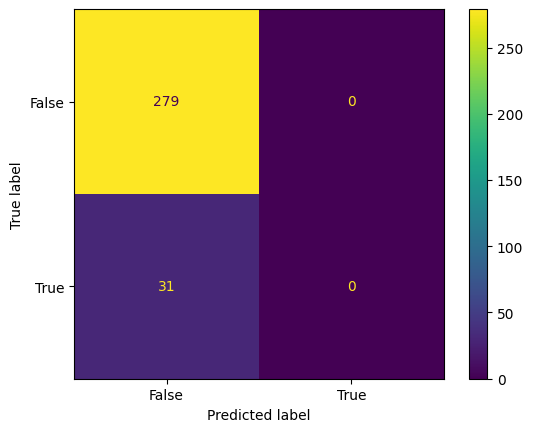

In [161]:
# Confusion matrix and Cnfusion display
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ', CM)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = [False, True])

cm_display.plot()
plt.show()

Decision Tree

In [162]:
X = df[['Gender', 'Car_Owner', 'Property_Owner', 'Children', 'Annual_Income',
       'Income_Type', 'Education', 'Marital_Status', 'Housing_Type',
       'Family_Members','Age', 'Employment_Tenure']]
y = df['Label']

# Split the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=True)

# Modelling
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train,y_train)

# normal prediction
y_pred = model.predict(X_test)

# prediction of test_data
y_pred_test = model.predict(X_test) #same

# Evaluation of test_data
from sklearn.metrics import accuracy_score
score = round(accuracy_score(y_test,y_pred_test)*100,2)
print('Test Accuracy',score,'%')

# prediction of train_data
y_pred_train = model.predict(X_train)

# Evaluation of train_data
from sklearn.metrics import accuracy_score
score_dtc = round(accuracy_score(y_train,y_pred_train)*100,2)
print('Train Accuracy: ',score_dtc,'%')

# using max_depth=7 to overcome Overfitting problem and bring the difference between test accuracy and train accuracy within 5% range.

# Cross Validation
from sklearn.model_selection import cross_val_score
cv_score_dtc = round(cross_val_score(model,X_train,y_train,cv=5).mean()*100,2)
print('CV_score: ',cv_score_dtc,'%')

Test Accuracy 87.1 %
Train Accuracy:  92.16 %
CV_score:  87.0 %


KNN

In [163]:
X = df[['Gender', 'Car_Owner', 'Property_Owner', 'Children', 'Annual_Income',
       'Income_Type', 'Education', 'Marital_Status', 'Housing_Type',
       'Family_Members','Age', 'Employment_Tenure']]
y = df['Label']

# Split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=True)

# model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)


# Prediction on test data
y_pred_test = model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
score_knn = round(accuracy_score(y_test,y_pred_test)*100,2)
print('Test Accuracy: ',score_knn,'%')

# Train accuracy
y_pred_train = model.predict(X_train)
train_accuracy_knn = round(accuracy_score(y_train,y_pred_train)*100,2)
print('Train Accuracy:',train_accuracy_knn,'%')

# Cross Validation
from sklearn.model_selection import cross_val_score
cv_score_knn = round(cross_val_score(model,X_train,y_train,cv=5).mean()*100,2)
print('CV_score: ',cv_score_knn,'%')

Test Accuracy:  87.1 %
Train Accuracy: 90.55 %
CV_score:  86.83 %


RANDOM FOREST CLASSIFIER

In [164]:
X = df[['Gender', 'Car_Owner', 'Property_Owner', 'Children', 'Annual_Income',
       'Income_Type', 'Education', 'Marital_Status', 'Housing_Type',
       'Family_Members','Age', 'Employment_Tenure']]
y = df['Label']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=True)

# Modelling
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

# predict on test data
y_pred_test = model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
score_rf = round(accuracy_score(y_test,y_pred_test)*100,2)
print('Test Accuracy: ', score_rf,'%')

# Train accuracy
y_pred_train = model.predict(X_train)
train_accuracy_rf = round(accuracy_score(y_train,y_pred_train)*100,2)
print('Train Accuracy:',train_accuracy_rf,'%')

# Cross Validation
from sklearn.model_selection import cross_val_score
cv_score_rf = round(cross_val_score(model,X_train,y_train,cv=5).mean()*100,2)
print('CV_score: ',cv_score_rf,'%')

Test Accuracy:  92.26 %
Train Accuracy: 99.43 %
CV_score:  91.76 %


Please perform necessary steps required to improve the accuracy of your model.

XGBOOST

In [165]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

# Select features and target variable
X = df[['Gender', 'Car_Owner', 'Property_Owner', 'Children', 'Annual_Income',
        'Income_Type', 'Education', 'Marital_Status', 'Housing_Type',
        'Family_Members','Age', 'Employment_Tenure']]
y = df['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model initialization and training
model_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model_xgb.fit(X_train, y_train)

# Prediction on test data
y_pred_test_xgb = model_xgb.predict(X_test)

# Evaluation - Test Accuracy
score_xgb = round(accuracy_score(y_test, y_pred_test_xgb) * 100, 2)
print('XGBoost Test Accuracy:', score_xgb, '%')

# Train accuracy
y_pred_train_xgb = model_xgb.predict(X_train)
train_accuracy_xgb = round(accuracy_score(y_train, y_pred_train_xgb) * 100, 2)
print('XGBoost Train Accuracy:', train_accuracy_xgb, '%')

# Cross Validation
cv_scores_xgb = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='accuracy')
cv_score_xgb = round(cv_scores_xgb.mean() * 100, 2)
print('XGBoost CV Score:', cv_score_xgb, '%')


XGBoost Test Accuracy: 93.87 %
XGBoost Train Accuracy: 98.95 %
XGBoost CV Score: 89.5 %


Please justify the most appropriate model.


Please compare all models (at least 4  models).

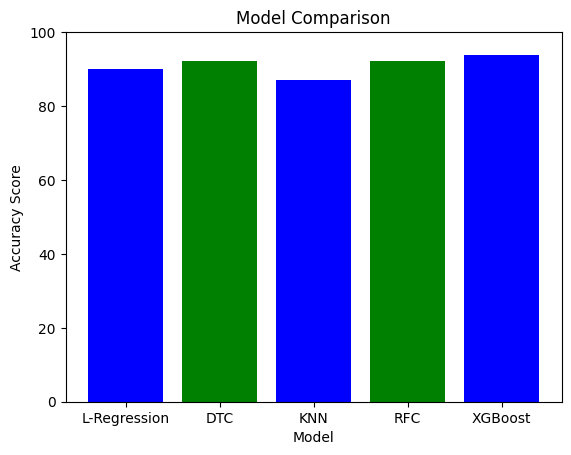

In [166]:
import matplotlib.pyplot as plt

# Model names and their respective accuracy scores
model_names = ['L-Regression', 'DTC', 'KNN', 'RFC', 'XGBoost']
accuracy_scores = [score_lr, score_dtc, score_knn, score_rf, score_xgb]

# Bar chart
plt.bar(model_names, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.ylim(0, 100)  # Set the y-axis limit to 100 for percentage scale
plt.show()


Conclusion:

Hence we got accuracy on different classification

-logisitic regression got accuracy 88%

-DecisionTree got accuracy 87%

-Random Forest got accuracy 92%

-KNN got accuracy 86%

-XGBOOST accuracy 90%

we have done all the elementry EDA steps needed and plotted various graphs to determine the correlation among the independent variables and also between the independent and dependent variable.

After feature selection we used five machine learning models and achieved quite good accuracy 92% in Random Forest for predicting the credit card approval.

MY SQL

In [167]:
# Importing duckdb library for DuckDB, a database management system.
import duckdb

In [168]:
# Reading the 'Credit_card.csv' file into a Pandas DataFrame named data1
data1 = pd.read_csv('Credit_card.csv')

# Reading the 'Credit_card_label.csv' file into a Pandas DataFrame named data2
data2 = pd.read_csv('Credit_card_label.csv')

# Merging data1 and data2 based on the 'Ind_ID' column with an inner join, and storing the result in sqldata
sqldata = data1.merge(data2, on='Ind_ID', how='inner')

In [180]:
# Creating a new column 'label' in sqldata based on the 'Label' column in df
# Applying a lambda function to map 0 to 'Approved' and 1 to 'Rejected'
sqldata['label'] = df['Label'].apply(lambda x: 'Approved' if x == 0 else 'Rejected')

In [170]:
# Establishing a connection to DuckDB and registering the DataFrame 'sqldata' as a table named 'sqldata'
conn = duckdb.connect()
conn.register('sqldata', sqldata)

Group the customers based on their income type and find the average of their annual income.

In [171]:
# Executing an SQL query to find the average annual income grouped by income type
result = conn.execute("SELECT Type_Income, avg(Annual_income) FROM sqldata group by Type_Income").fetchdf()
result

,Type_Income,avg(Annual_income)
0,Pensioner,155175.096226
1,Working,181048.757306
2,State servant,211422.413793
3,Commercial associate,234600.000000


Find the female owners of cars and property.

In [172]:
# Executing an SQL query to find female customers who own both a car and a property
result = conn.execute("SELECT * FROM sqldata WHERE GENDER='F' AND (Car_Owner='Y' AND Propert_Owner='Y')").fetchdf()
result

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,Rejected
1,5018501,F,Y,Y,0,NaN,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,Rejected
2,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,Rejected
3,5024213,F,Y,Y,0,540000.0,Commercial associate,Higher education,Married,House / apartment,-15702.0,-185,1,0,1,0,None,2,Rejected
4,5036660,F,Y,Y,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23835.0,365243,1,0,0,0,None,2,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5048458,F,Y,Y,1,126000.0,Working,Higher education,Married,House / apartment,-9441.0,-157,1,0,0,0,None,3,Approved
173,5023719,F,Y,Y,0,175500.0,Pensioner,Higher education,Married,House / apartment,-22077.0,365243,1,0,1,0,None,2,Approved
174,5033520,F,Y,Y,3,180000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12559.0,-5862,1,0,1,0,Medicine staff,5,Approved
175,5024049,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,-12903.0,-2924,1,0,0,0,Accountants,3,Approved


Find the male customers who are staying with their families.

In [173]:
# Executing an SQL query to find male customers who are staying with their families
result = conn.execute("SELECT * FROM sqldata WHERE GENDER='M' AND Family_Members>0").fetchdf()
result

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,None,2,Rejected
1,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,Rejected
2,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,Rejected
3,5010869,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,1,Rejected
4,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,-8907.0,-913,1,0,0,1,None,3,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,5096856,M,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17975.0,-3476,1,0,0,0,Drivers,2,Approved
564,5090942,M,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-13336.0,-1436,1,0,0,0,Low-skill Laborers,2,Approved
565,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,0,1,0,Drivers,3,Approved
566,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,Approved


Please list the top five people having the highest income.

In [174]:
# Executing an SQL query to list the top five people having the highest income
result = conn.execute("SELECT * FROM sqldata ORDER BY Annual_income DESC LIMIT 5").fetchdf()
result

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10142.0,-2479,1,0,0,0,Managers,2,Approved
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10142.0,-2479,1,0,0,0,Managers,2,Approved
2,5090470,M,N,Y,1,900000.0,Working,Secondary / secondary special,Married,House / apartment,-15380.0,-4509,1,0,0,0,Laborers,3,Approved
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,-9889.0,-1000,1,0,0,0,Managers,4,Approved
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,-9889.0,-1000,1,0,0,0,Managers,4,Approved


How many married people are having bad credit?

In [175]:
# Executing an SQL query to count the number of married people with bad credit
result = conn.execute("SELECT COUNT(Ind_ID) as Number_of_Married_BadCredit FROM sqldata WHERE Marital_status='Married' AND label='Rejected'").fetchdf()
result

,Number_of_Married_BadCredit
0,114


What is the highest education level and what is the total count?

In [176]:
# Executing an SQL query to count the number of individuals with higher education
result = conn.execute("SELECT COUNT(Ind_ID) FROM sqldata WHERE EDUCATION='Higher education'").fetchdf()
result

,count(Ind_ID)
0,426


Between married males and females, who is having more bad credit?

In [177]:
# Executing an SQL query to count the number of rejected applications based on gender
result = conn.execute("SELECT GENDER, SUM(CASE WHEN label='Rejected' THEN 1 ELSE 0 END) FROM sqldata GROUP BY GENDER").fetchdf()
result

,GENDER,"sum(CASE WHEN ((""label"" = 'Rejected')) THEN (1) ELSE 0 END)"
0,None,5.0
1,M,75.0
2,F,95.0
